# RNN (by Tensorflow)

In [1]:
VOCAB_SIZE = 300 # 사용할 단어 수
SEQ_LEN = 100    # 시퀀스 하나의 최대 길이

### 데이터 준비

In [2]:
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=VOCAB_SIZE)

In [3]:
train_input.shape, train_target.shape, test_input.shape, test_target.shape

((25000,), (25000,), (25000,), (25000,))

In [4]:
train_input, test_input = train_input[:10000], test_input[:5000]
train_target, test_target = train_target[:10000], test_target[:5000]

In [5]:
len(train_input[0]), len(train_input[1])

(218, 189)

In [6]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=SEQ_LEN)
test_seq = pad_sequences(test_input, maxlen=SEQ_LEN)

train_seq.shape, test_seq.shape

((10000, 100), (5000, 100))

In [7]:
from tensorflow.keras.utils import to_categorical

train_onehot = to_categorical(train_seq)
test_onehot = to_categorical(test_seq)

train_onehot.shape, test_onehot.shape

((10000, 100, 300), (5000, 100, 300))

### 모델 준비 및 학습

In [8]:
from tensorflow.keras import models, layers, callbacks, optimizers

input = layers.Input(shape=(SEQ_LEN, VOCAB_SIZE))
x = layers.SimpleRNN(units=8)(input)
output = layers.Dense(1, activation='sigmoid')(x)

model = models.Model(input, output)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 300)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 8)              │         2,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,481 (9.69 KB)

 Trainable params: 2,481 (9.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5074 - loss: 0.6974 - val_accuracy: 0.5295 - val_loss: 0.6921 - learning_rate: 0.0010
Epoch 2/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5591 - loss: 0.6819 - val_accuracy: 0.5840 - val_loss: 0.6736 - learning_rate: 0.0010
Epoch 3/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5849 - loss: 0.6698 - val_accuracy: 0.5915 - val_loss: 0.6764 - learning_rate: 0.0010
Epoch 4/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6606 - loss: 0.6237 - val_accuracy: 0.7095 - val_loss: 0.5932 - learning_rate: 0.0010
Epoch 5/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7096 - loss: 0.5735 - val_accuracy: 0.7185 - val_loss: 0.5679 - learning_rate: 0.0010
Epoch 6/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7399 - loss: 0.5394 - val_accuracy: 0.7450 - val_loss: 0.5366 - learning_rate: 0.0010
Epoch 7/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7506 - loss: 0

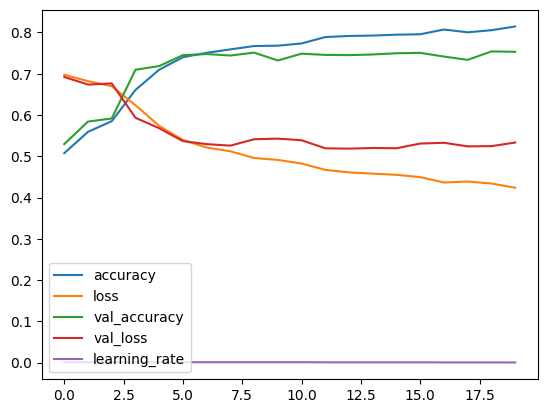

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping_cb = callbacks.EarlyStopping(patience=7, restore_best_weights=True, verbose=1)

reduct_lr_on_plateau_cb = callbacks.ReduceLROnPlateau(patience=3, factor=0.7, verbose=1)

history = model.fit(
    train_onehot,
    train_target,
    epochs=100,
    batch_size=65,
    validation_split=0.2,
    callbacks=[early_stopping_cb, reduct_lr_on_plateau_cb]
)

history_df = pd.DataFrame(history.history)
history_df.plot()
plt.show()

In [10]:
loss, accuracy = model.evaluate(test_onehot, test_target)
loss, accuracy

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7218 - loss: 0.5467


(0.5467495322227478, 0.7218000292778015)